# Explainable Machine Learning for Diabetes Risk Stratification in Population Health

# Problem Understanding

In [1]:
"""              📌 Trả lời rõ:

🧠 MỤC TIÊU DỰ ÁN (AIL cần gì → bạn có cái đó)
Mục tiêu chính:
Ứng dụng Machine Learning để dự đoán nguy cơ mắc bệnh tiểu đường


Phân tích yếu tố sức khỏe & lối sống ảnh hưởng mạnh nhất


So sánh nhiều mô hình ML → chọn mô hình tốt nhất

"""

'              📌 Trả lời rõ:\n\n🧠 MỤC TIÊU DỰ ÁN (AIL cần gì → bạn có cái đó)\nMục tiêu chính:\nỨng dụng Machine Learning để dự đoán nguy cơ mắc bệnh tiểu đường\n\n\nPhân tích yếu tố sức khỏe & lối sống ảnh hưởng mạnh nhất\n\n\nSo sánh nhiều mô hình ML → chọn mô hình tốt nhất\n\n'

# Solution


# SET UP

In [5]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical modeling (for odds ratio, p-values)
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Train-test & validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    mean_squared_error,
    r2_score
)

# Plot style
sns.set()
plt.style.use("ggplot")

# Warning 
import warnings
warnings.simplefilter(action = "ignore")

# If you are using Jupyter Notebook
%matplotlib inline


# Get the Data

In [7]:
# read  the dataset 

PATH = "diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(PATH)

## Quick Look at the datastructure

In [9]:
df.head() 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


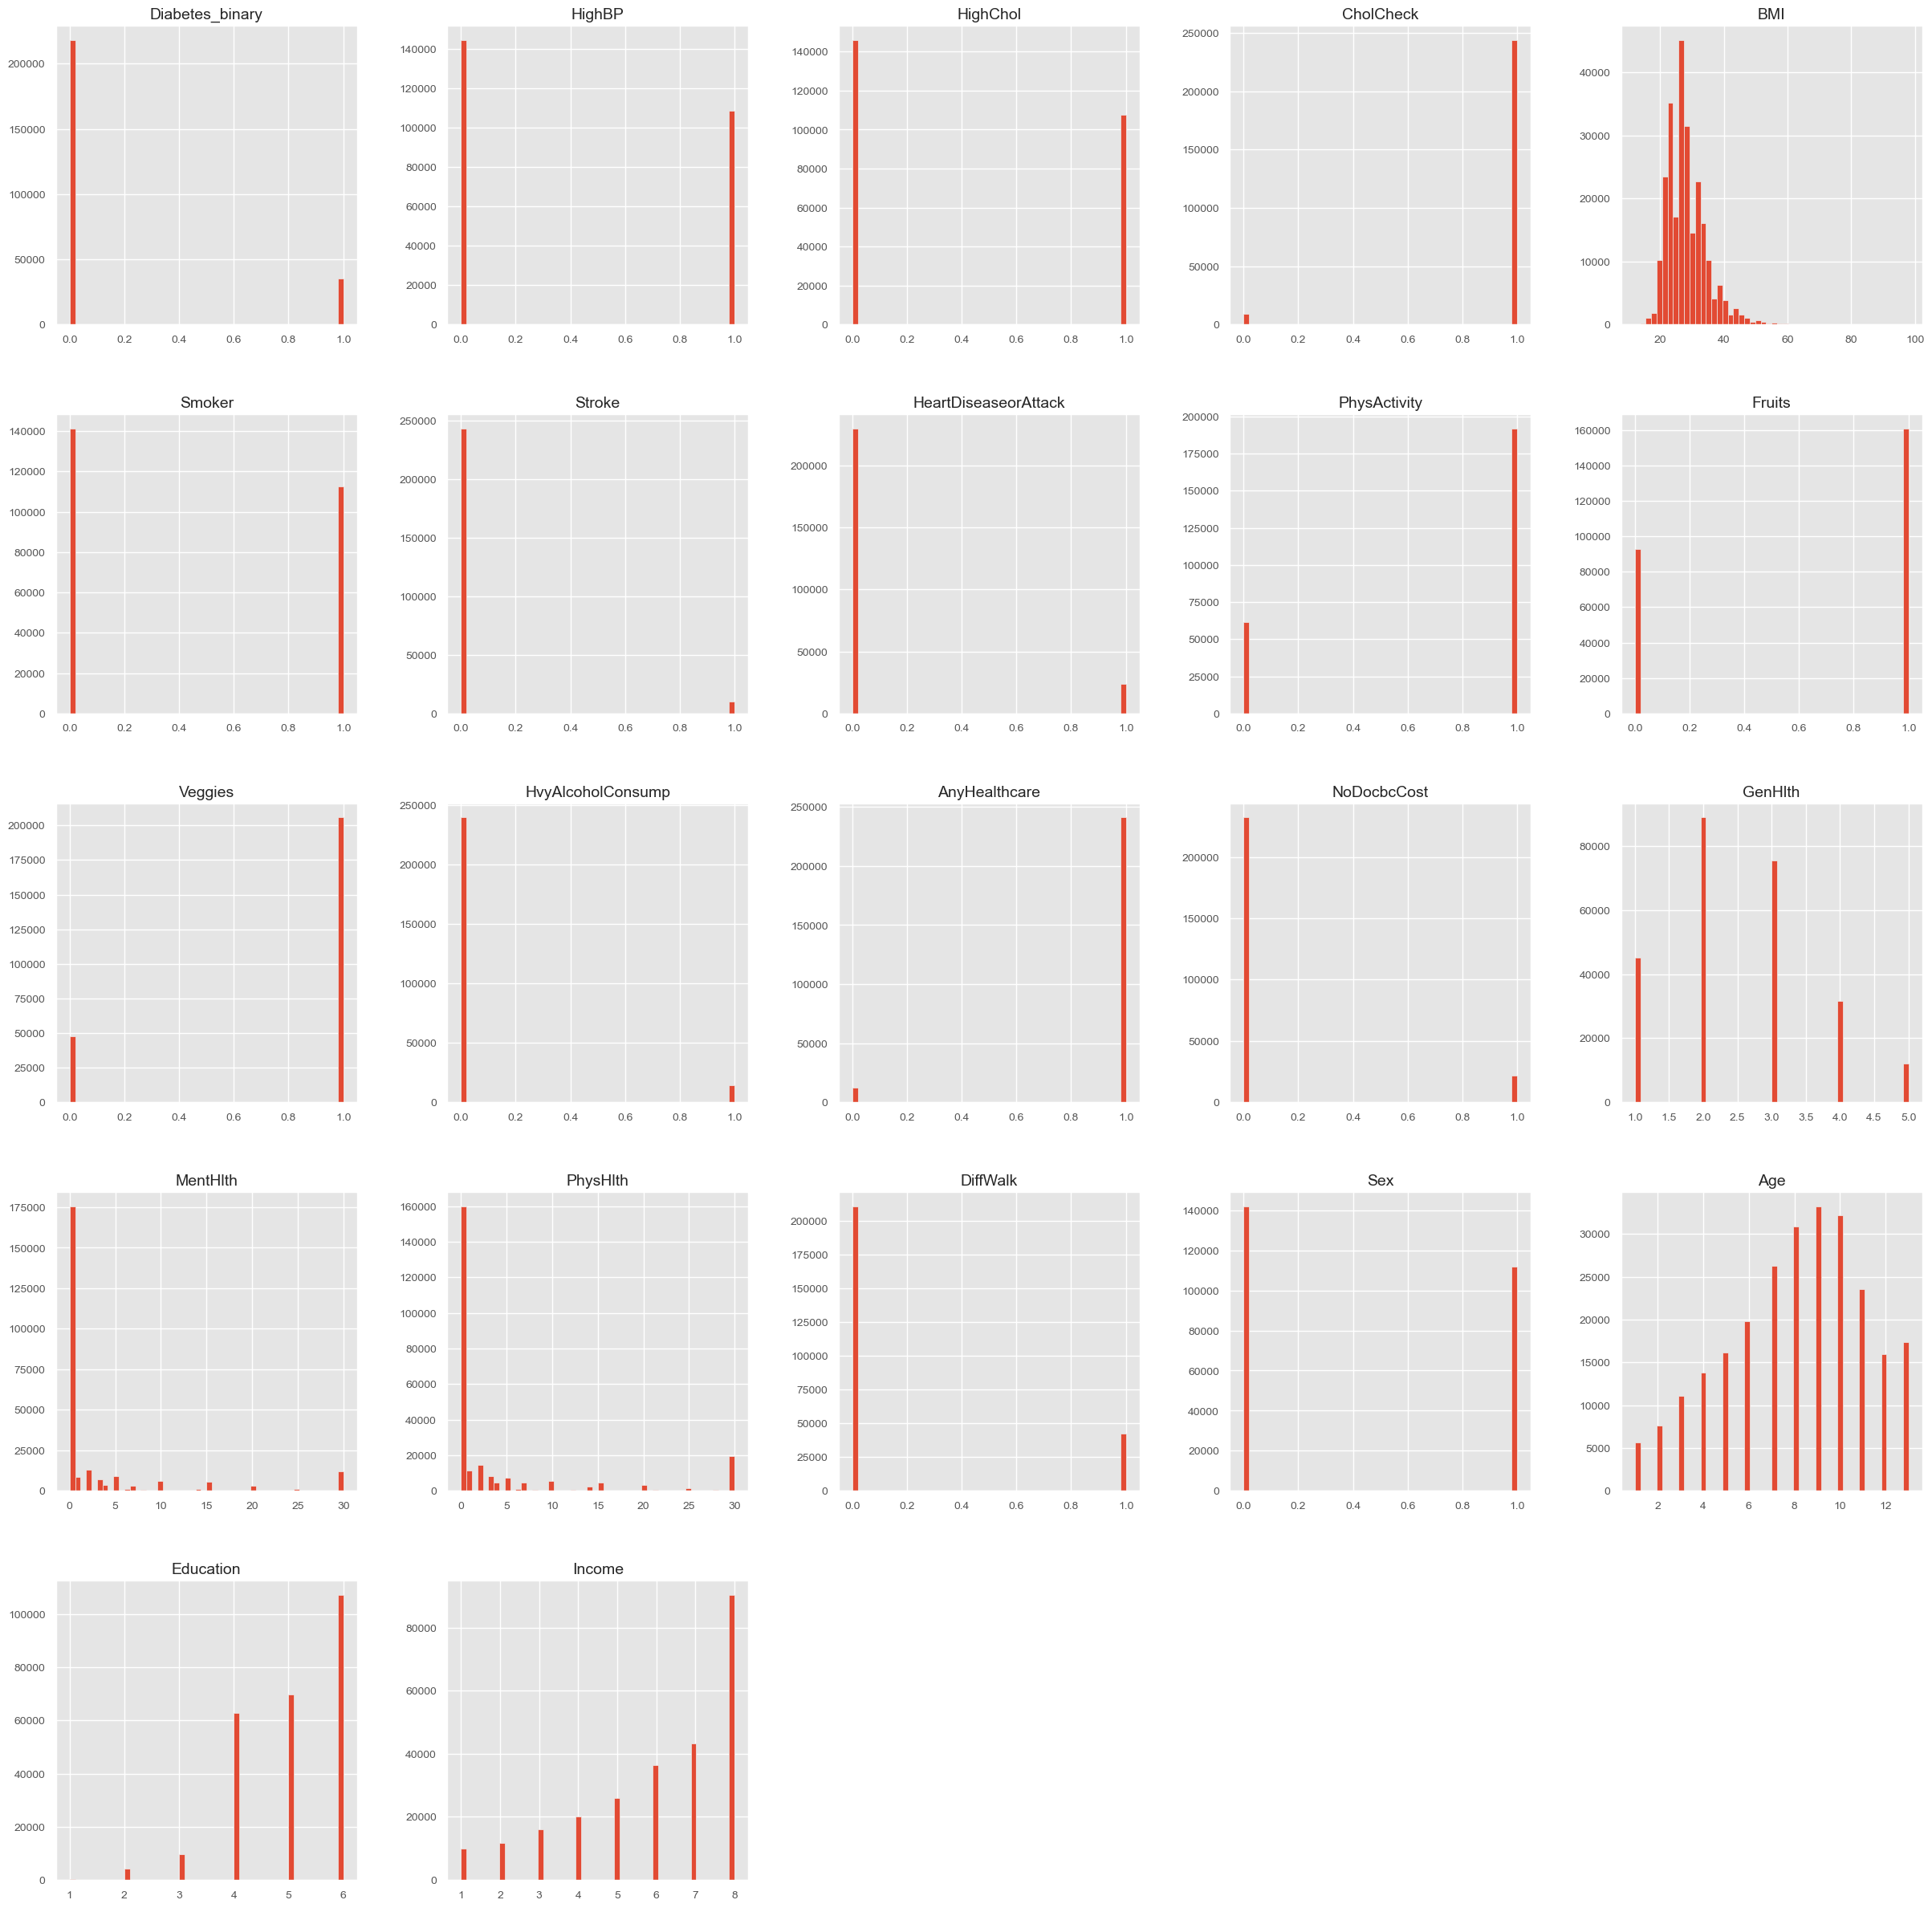

In [12]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(30, 30))

plt.show()

# EDA

### data describe

In [32]:
def describe_dataset():
    """
    Returns a description of the Diabetes Health Indicators Dataset
    with a binary target variable.
    """
    description = {
        "dataset_name": "Diabetes Health Indicators Dataset",
        "source": (
            "Behavioral Risk Factor Surveillance System (BRFSS), "
            "conducted annually by the CDC (Centers for Disease Control and Prevention, USA)"
        ),
        "purpose": (
            "Analyze and predict diabetes status using health indicators, "
            "lifestyle habits, related diseases, and demographic factors."
        ),
        "target_variable": {
            "name": "Diabetes_binary",
            "type": "binary",
            "classes": {
                0: "No diabetes",
                1: "Diabetes"
            }
        },
        "feature_groups": {
            "health_indicators": [
                "HighBP",
                "HighChol",
                "BMI",
                "GenHlth",
                "PhysHlth",
                "MentHlth"
            ],
            "lifestyle_habits": [
                "Smoker",
                "PhysActivity",
                "HvyAlcoholConsump",
                "Fruits",
                "Veggies"
            ],
            "related_diseases": [
                "HeartDiseaseorAttack",
                "Stroke",
                "DiffWalk"
            ],
            "demographics": [
                "Age",
                "Sex",
                "Education",
                "Income"
            ]
        }
    }

    return description


## Discover and Visualize the Data to Gain Insights

In [55]:
data_visualize = df.copy()

In [57]:
import numpy as np
import pandas as pd

data_visualize["BMI_category"] = pd.cut(
    data_visualize["BMI"],
    bins=[0, 18.5, 25, 30, np.inf],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)



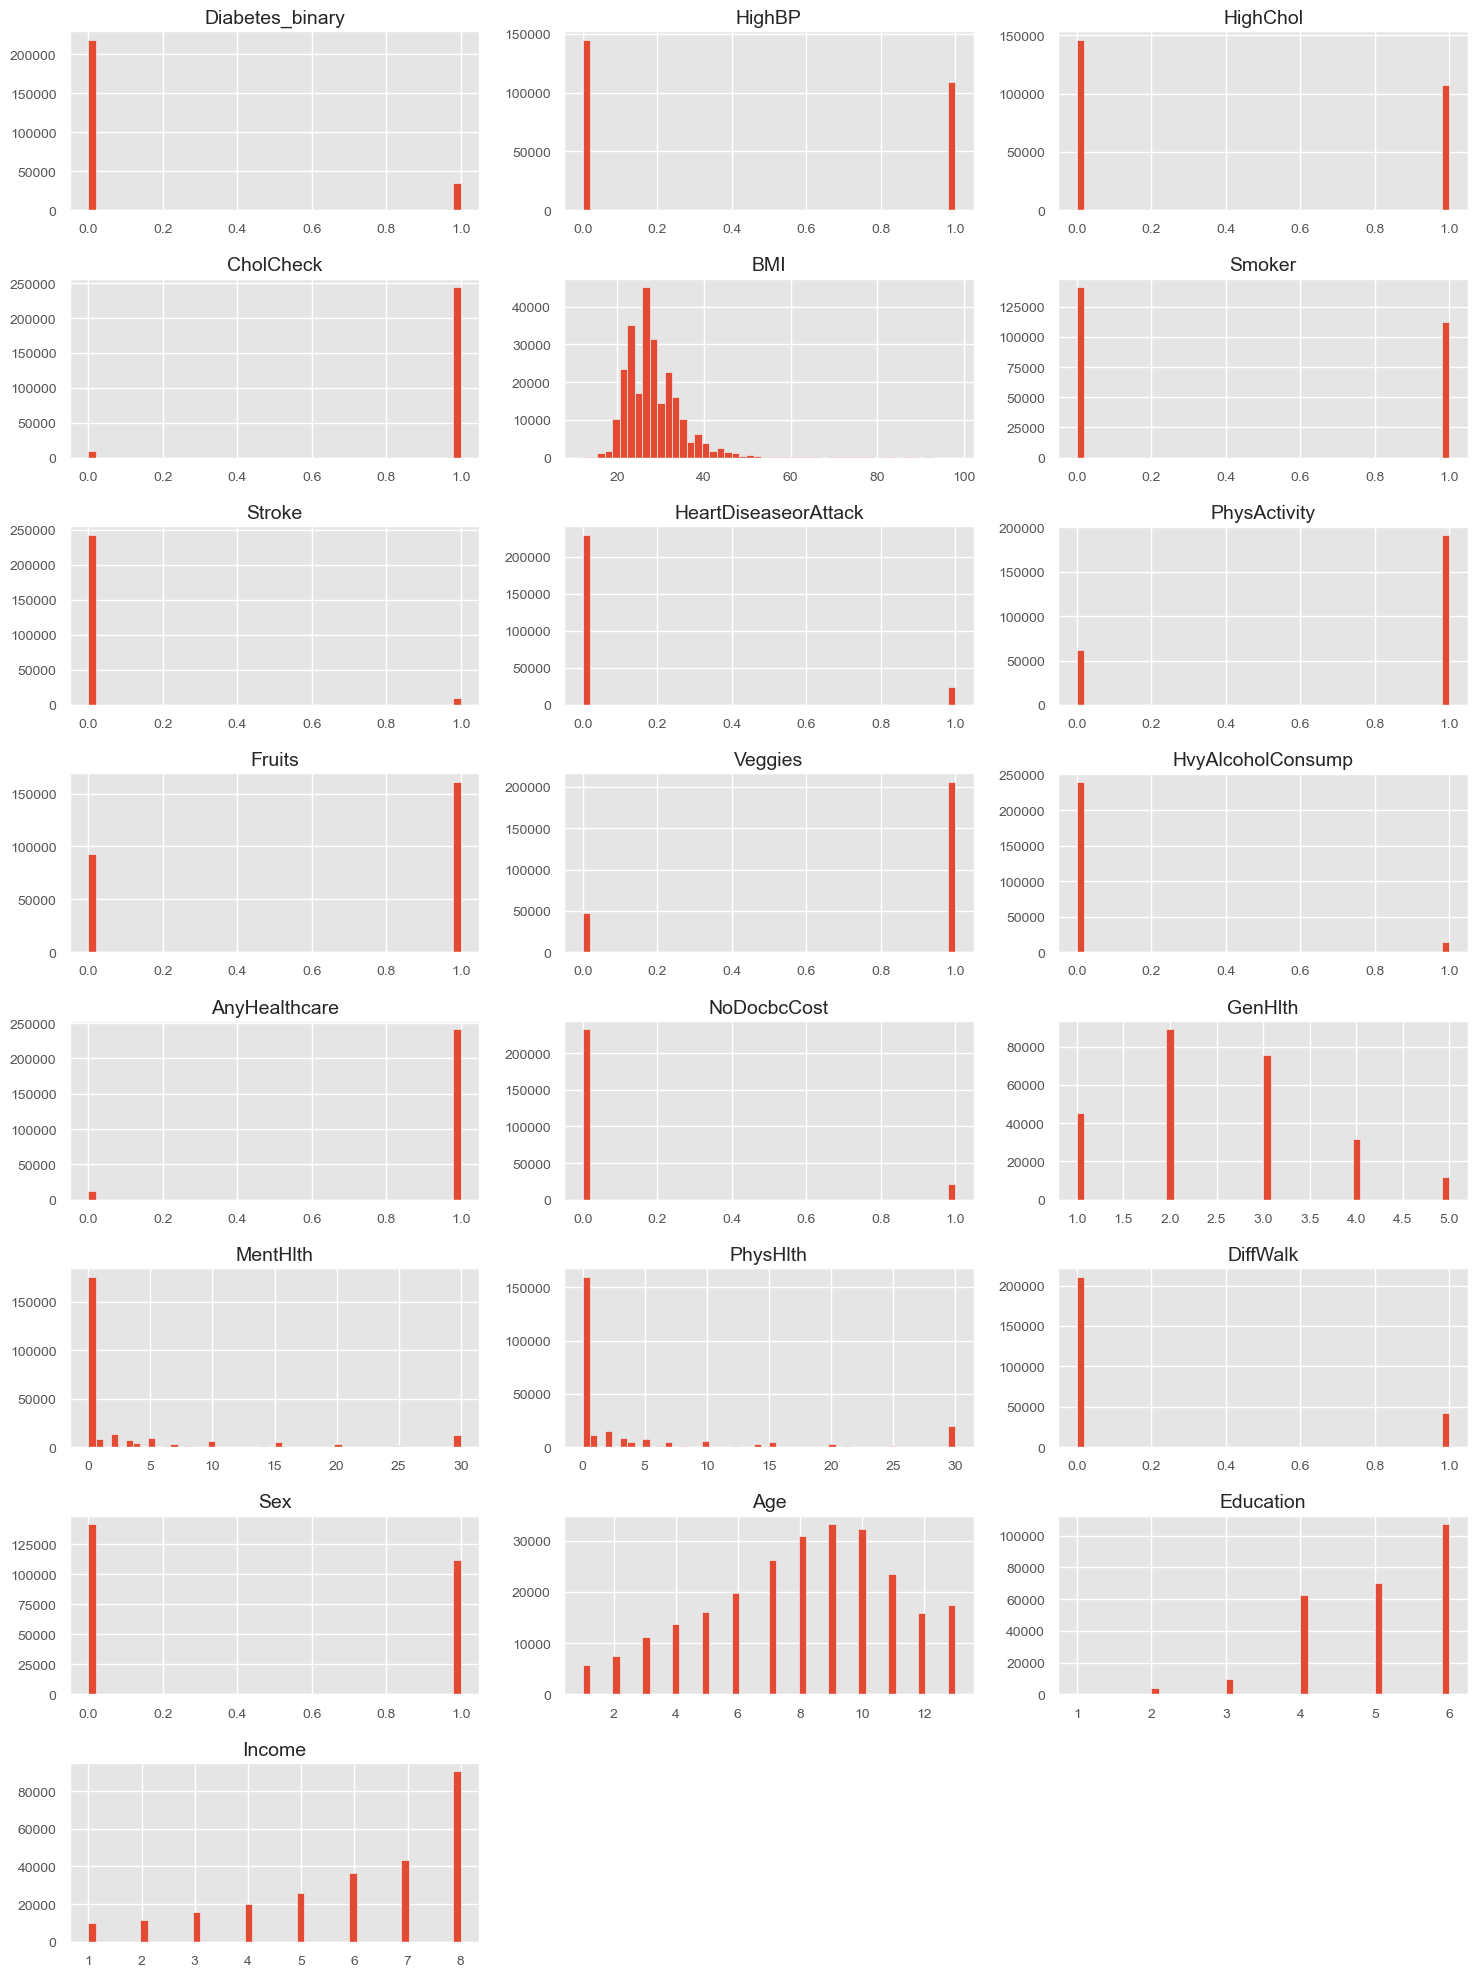

In [59]:
import matplotlib.pyplot as plt

# --- Tạo figure với 2 subplot ---
fig, axes = plt.subplots(2, 1, figsize=(15, 20))  # 2 hàng, 1 cột

# --- Subplot 1: Histogram tất cả numeric columns ---
data_visualize[data_visualize.select_dtypes(include=np.number).columns].hist(
    bins=50, ax=axes[0], layout=(int(len(data_visualize.select_dtypes(include=np.number).columns)/3)+1, 3)
)
axes[0].set_title("Histogram of Numeric Features")

# --- Subplot 2: Bar plot BMI_category ---
order = ['Underweight', 'Normal', 'Overweight', 'Obese']  # ví dụ order
data_visualize['BMI_category'].value_counts().reindex(order).plot(
    kind='bar', ax=axes[1]
)
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of BMI Categories')

plt.tight_layout()
plt.show()


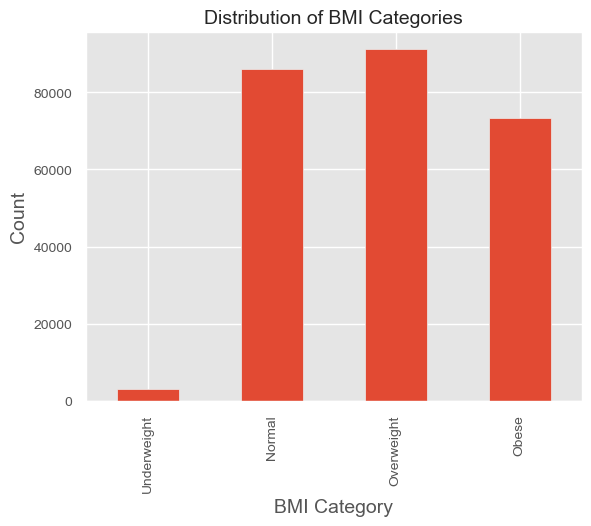

In [60]:
order = ["Underweight", "Normal", "Overweight", "Obese"]

data_visualize['BMI_category'].value_counts().reindex(order).plot(kind='bar')

plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')
plt.show()


### Looking for Correlations

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [125]:
corr_matrix = data_visualize.drop(columns = "BMI_category").corr()
corr_matrix["Diabetes_binary"].sort_values(ascending = False)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

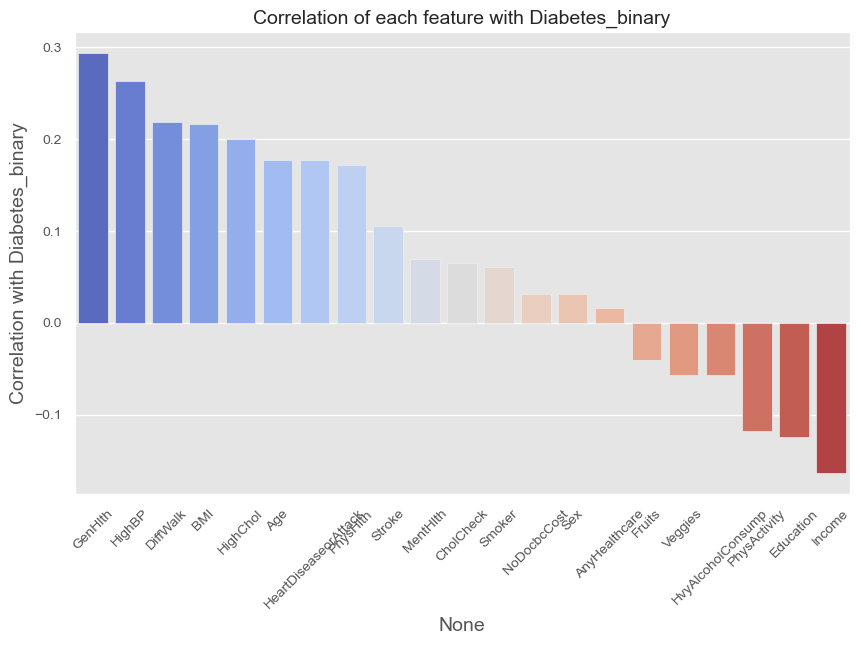

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy correlation với target
target_corr = corr_matrix["Diabetes_binary"].sort_values(ascending=False)

# Vẽ bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Correlation with Diabetes_binary")
plt.title("Correlation of each feature with Diabetes_binary")
plt.show()


In [129]:
# Phân bố BMI có dạng lệch phải (right-skewed), với phần lớn giá trị tập trung trong khoảng từ 20 đến 35. 
#Điều này cho thấy đa số đối tượng có BMI thuộc mức bình thường đến thừa cân.


#Biến Age đại diện cho các nhóm tuổi có thứ tự, thay vì tuổi chính xác. 
#Phân bố cho thấy phần lớn các cá nhân thuộc nhóm tuổi trung niên đến cao tuổi, 
#cho thấy bộ dữ liệu có xu hướng nghiêng về nhóm dân số lớn tuổi.


# Phân phối của PhysHlth lệch phải rất mạnh, với phần lớn giá trị tập trung tại 0 ngày, 
#cho thấy đa số người tham gia không gặp vấn đề sức khỏe thể chất trong tháng qua.
#Một nhóm nhỏ báo cáo tình trạng sức khỏe kém kéo dài, thể hiện qua đỉnh tại 30 ngày.


# MentHlth 
#Phân phối của MentHlth lệch phải rất mạnh, với phần lớn giá trị tập trung tại 0 ngày, 
#cho thấy đa số người tham gia không gặp vấn đề về sức khỏe tinh thần trong tháng qua.
#Một nhóm nhỏ gặp vấn đề tinh thần kéo dài, thể hiện qua đỉnh tại 30 ngày.

#High BP
#Phân phối dữ liệu (Distribution): Biến HighBP là biến phân loại nhị phân
#biểu đồ cho thấy số lượng người không bị cao huyết áp (giá trị 0) cao hơn so với nhóm có cao huyết áp (giá trị 1).

# GenhLth
#Loại biến và Phân phối (Distribution):
#GenHlth là một biến thứ bậc (ordinal categorical variable) với 5 mức độ.

#Phân phối của biến này có dạng lệch phải (right-skewed). 
#Phần lớn các quan sát tập trung vào nhóm sức khỏe từ "Tốt" đến "Rất tốt" (mức 1, 2, 3), 
#và giảm dần khi về phía sức khỏe kém (mức 4, 5).

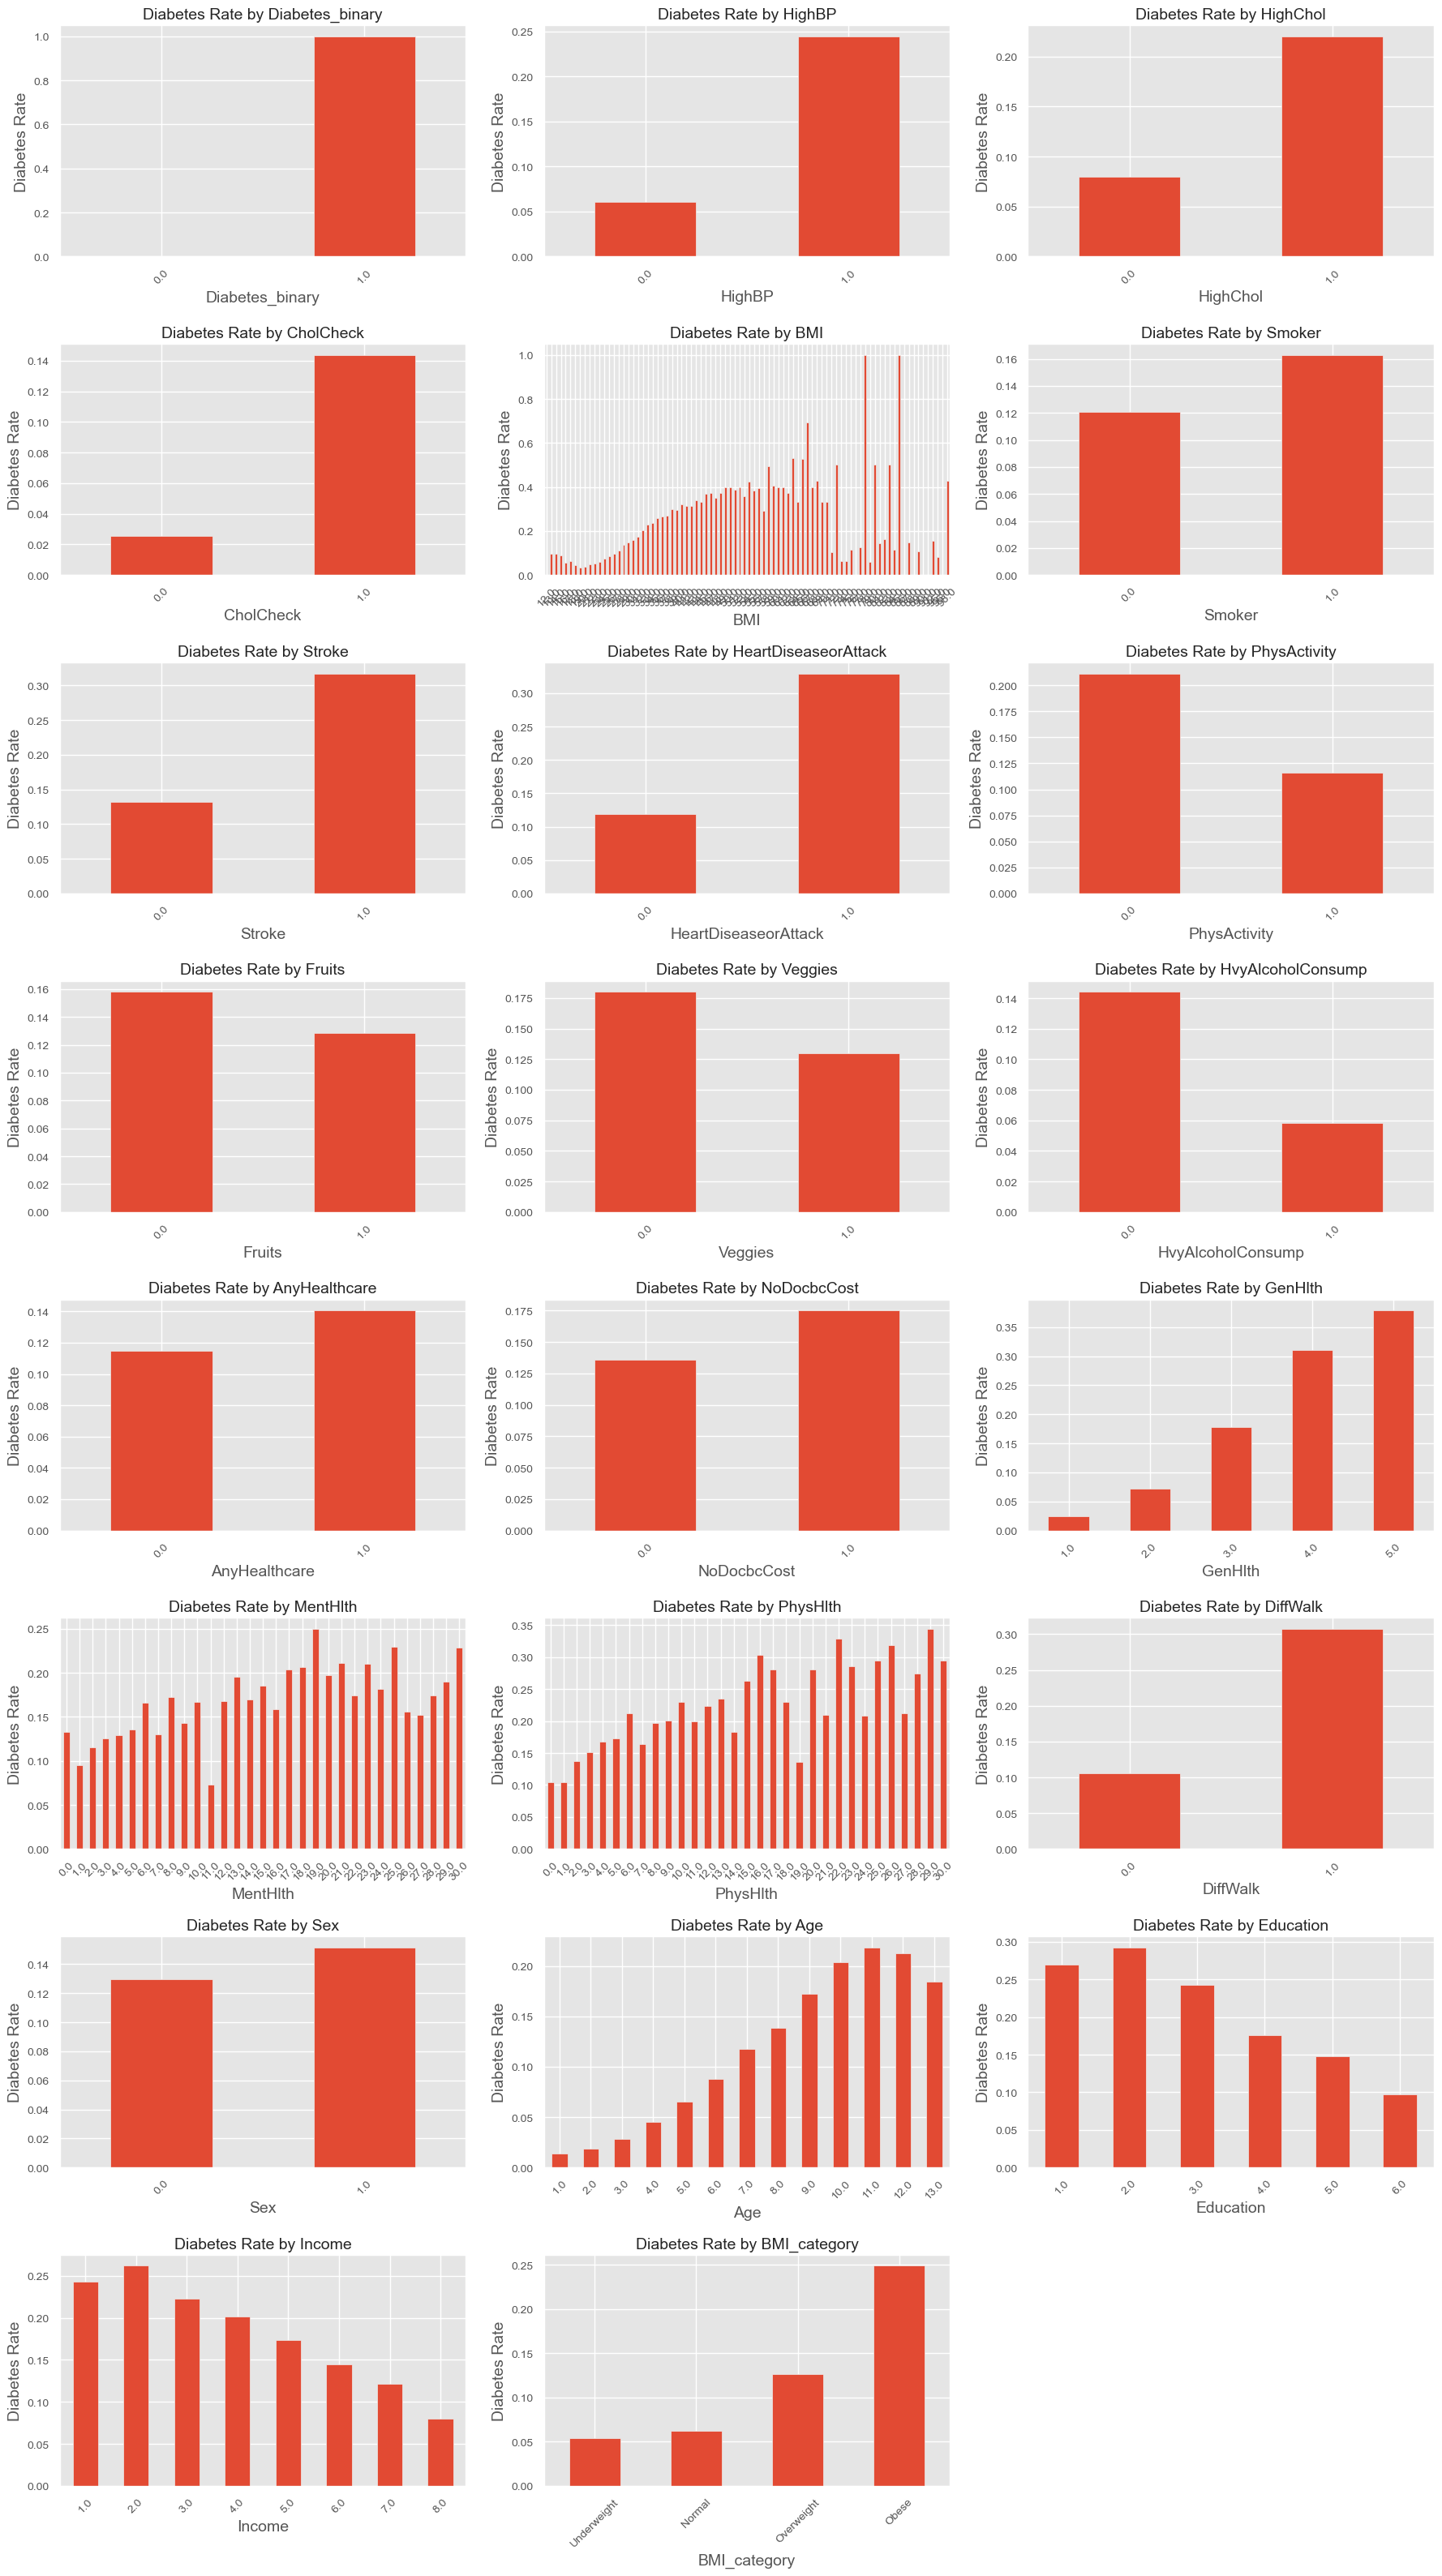

In [131]:
features = data_visualize.columns
import matplotlib.pyplot as plt

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 4 * n_rows))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)

    rate = data_visualize.groupby(feature)["Diabetes_binary"].mean()
    rate.plot(kind="bar")

    plt.xlabel(feature)
    plt.ylabel("Diabetes Rate")
    plt.title(f"Diabetes Rate by {feature}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [133]:
# tạm thời là như này  cho EDA
data_visualize.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_category'],
      dtype='object')

## Hypothesis relationship between features with diabetes

In [115]:
import statsmodels.api as sm

# y và X
y = data_visualize["Diabetes_binary"]
X = data_visualize.drop(columns=["Diabetes_binary", "BMI_category"])
X = sm.add_constant(X)

# Fit OLS
model = sm.OLS(y, X).fit()

# Lấy bảng chi tiết từ summary2()
summary_df = model.summary2().tables[1]

# Chỉ giữ các cột cần thiết
table = summary_df[["Coef.", "Std.Err.", "t", "P>|t|"]].copy()

# Làm tròn p-value cho dễ đọc
table["P>|t|"] = table["P>|t|"].apply(lambda x: round(x, 6))

print(table)

# In luôn F-test toàn mô hình
print("\n=== F-test toàn mô hình ===")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"F-test p-value: {model.f_pvalue:.6f}")


                         Coef.  Std.Err.          t     P>|t|
const                -0.298288  0.006779 -44.002972  0.000000
HighBP                0.075295  0.001467  51.321442  0.000000
HighChol              0.055994  0.001380  40.584927  0.000000
CholCheck             0.043589  0.003375  12.916937  0.000000
BMI                   0.006878  0.000102  67.638289  0.000000
Smoker               -0.005899  0.001324  -4.455175  0.000008
Stroke                0.037402  0.003317  11.274611  0.000000
HeartDiseaseorAttack  0.067426  0.002333  28.901088  0.000000
PhysActivity         -0.006849  0.001578  -4.340374  0.000014
Fruits               -0.001680  0.001379  -1.218898  0.222884
Veggies              -0.002781  0.001697  -1.638837  0.101248
HvyAlcoholConsump    -0.050754  0.002766 -18.349398  0.000000
AnyHealthcare         0.015059  0.003078   4.892225  0.000001
NoDocbcCost          -0.007334  0.002425  -3.024333  0.002492
GenHlth               0.047864  0.000790  60.624986  0.000000
MentHlth

In [ ]:
# t càng cao thì biến đó càng có ảnh hưởng thật sự tới y 

## Attribute Combinations

In [18]:
data_visualize["Age_BMI"] = data_visualize["Age"] * data_visualize["BMI"]
# Người trẻ béo ≠ người già béo
data_visualize["MetabolicRisk"] = (
    data_visualize["HighBP"] +
    data_visualize["HighChol"] +
    data_visualize["BMI_category"].map({
        "Underweight": 0,
        "Normal": 0,
        "Overweight": 1,
        "Obese": 2
    })
)
# Feature MetabolicRisk  tính theo y khoa

# Phản ánh sức khỏe tổng thể kém
data_visualize["LifestyleRisk"] = (
    data_visualize["Smoker"] +
    (1 - data_visualize["PhysActivity"]) +
    data_visualize["HvyAlcoholConsump"]
)
# phản ánh lối sống 

# đại khái là thêm các combinition có thử corr cao hơn hay không.


In [19]:
data_visualize.corr(numeric_only = True)["Diabetes_binary"].sort_values(ascending = False)

Diabetes_binary         1.000000
MetabolicRisk           0.320295
GenHlth                 0.293569
Age_BMI                 0.280484
HighBP                  0.263129
BMI                     0.234641
DiffWalk                0.218344
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
LifestyleRisk           0.092029
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

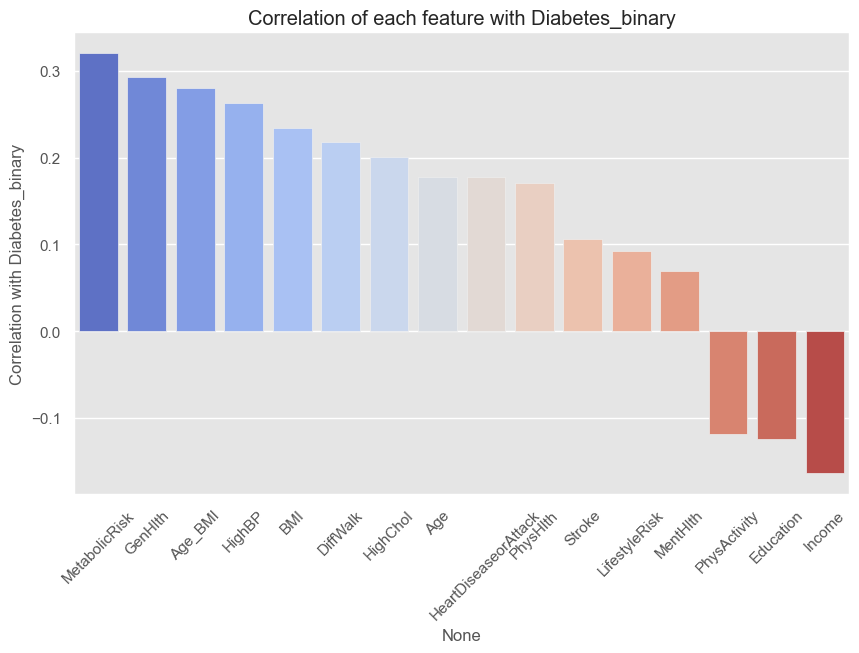

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy correlation với target
target_corr = corr_matrix["Diabetes_binary"].sort_values(ascending=False)

# Vẽ bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Correlation with Diabetes_binary")
plt.title("Correlation of each feature with Diabetes_binary")
plt.show()


# Prepare the Data for Machine Learning Algorithms

## Data Cleaning

### Detect Outlier

In [58]:
# Outlier Detection
# IQR 
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    if df[(df[feature] > upper)].any(axis = None):
        print(feature, "yes")
    else:
        print(feature, "no")
# only BMI have Outlier

Diabetes_binary yes
HighBP no
HighChol no
CholCheck no
BMI no
Smoker no
Stroke yes
HeartDiseaseorAttack yes
PhysActivity no
Fruits no
Veggies no
HvyAlcoholConsump yes
AnyHealthcare no
NoDocbcCost yes
GenHlth yes
MentHlth yes
PhysHlth yes
DiffWalk yes
Sex no
Age no
Education no
Income no


In [60]:
features_outlier = ["BMI"]
for feature in features_outlier:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1 
    upper = Q3 + IQR * 1.5
    lower = Q1 - IQR* 1.5
    df.loc[df[feature] > upper, feature] = upper
    df.loc[df[feature] < lower, feature] = lower


### Split DATA 

In [113]:
data_visualize.drop(columns=["BMI_category"], inplace=True) # drop BMI_category
feature_cols = data_visualize.columns.drop("Diabetes_binary")

X = data_visualize[feature_cols]
y = data_visualize["Diabetes_binary"]


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
X_test.shape, y_test.shape

((50736, 21), (50736,))

In [117]:
y_train.value_counts(normalize=True)


Diabetes_binary
0.0    0.860666
1.0    0.139334
Name: proportion, dtype: float64

## Feature Scaling

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## SMOTE DATA

## train model 

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"   # rất quan trọng
)

log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_train = log_reg.predict(X_train_scaled)


y_pred = log_reg.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))

[[31851 11816]
 [ 1718  5351]]
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43667
         1.0       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736

0.7349219489120151
0.733246609902239


In [39]:
# ROC – AUC (RẤT ĐÁNG GIÁ)
from sklearn.metrics import roc_auc_score

y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_prob)


0.8188351464186173

# Select and Train a model 

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

In [ ]:
models = []

models.append(("RandomForestClassifier", RandomForestClassifier(random_state = 42)))
models.append(("SGDClassifier", SGDClassifier(random_state = 42)))
#models.append(("SVC", SVC(random_state = 42)))
#models.append(("LogisticRegression", LogisticRegression(random_state = 42)))
#models.append(("KNN", KNeighborsClassifier()))

"""
models.append(("OneVsRestClassifier", OneVsRestClassifier(random_state = 42)))
models.append(("OneVsOneClassifier", OneVsOneClassifier(random_state = 42)))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state = 42)))
"""


## Evaluation Using Cross-validation

In [45]:
from sklearn.model_selection import cross_val_score

### train with origin_data

In [47]:

for name, model in models:
    print(f"\n\n {name} (origin_data):")
    print(cross_val_score(model, X_train, y_train, cv = 3, scoring = "recall"))

    



 RandomForestClassifier (origin_data):
[0.19586207 0.19382559 0.19308296]


 SGDClassifier (origin_data):
[0.11671088 0.10693826 0.47676639]


### train with scaled_data

In [48]:

for name, model in models:
    print(f"\n\n {name} (scaled_data):")
    print(cross_val_score(model, X_train_scaled, y_train, cv = 3, scoring = "recall"))




 RandomForestClassifier (scaled_data):
[0.19586207 0.19393168 0.19329514]


 SGDClassifier (scaled_data):
[0. 0. 0.]


### train with SMOTE Data

In [49]:
for name, model in models:
    print(f"\n\n {name} (SMOTE_data):")
    print(cross_val_score(model, X_train_res, y_train_res, cv = 3, scoring = "recall"))



 RandomForestClassifier (SMOTE_data):
[0.54247535 0.99685691 0.99622136]


 SGDClassifier (SMOTE_data):
[0.80127787 0.69680367 0.60851568]


### ROC SCORE

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

log_reg.fit(X_train_scaled, y_train)
y_pred_train = log_reg.predict(X_train_scaled)


y_pred = log_reg.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_prob)

[[31851 11816]
 [ 1718  5351]]
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43667
         1.0       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736

0.7349219489120151
0.733246609902239


0.8188351464186173

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=50,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train_scaled)


y_pred = dt.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_prob)


[[34633  9034]
 [ 3244  3825]]
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85     43667
         1.0       0.30      0.54      0.38      7069

    accuracy                           0.76     50736
   macro avg       0.61      0.67      0.62     50736
weighted avg       0.83      0.76      0.78     50736

0.7570659886471145
0.7580022075055187


0.8188351464186173

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=2,
    min_samples_leaf=4,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train_scaled)


y_pred = rf.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_prob)
# overfitting

[[43667     0]
 [ 7069     0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     43667
         1.0       0.00      0.00      0.00      7069

    accuracy                           0.86     50736
   macro avg       0.43      0.50      0.46     50736
weighted avg       0.74      0.86      0.80     50736

0.8606659965310628
0.8606709239987386


0.8188351464186173

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train_scaled)


y_pred = gb.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_prob)


[[43667     0]
 [ 7069     0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     43667
         1.0       0.00      0.00      0.00      7069

    accuracy                           0.86     50736
   macro avg       0.43      0.50      0.46     50736
weighted avg       0.74      0.86      0.80     50736

0.8606659965310628
0.8606709239987386


0.8188351464186173

In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train_scaled)


y_pred = xgb.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_prob)

[[42326  1341]
 [ 5999  1070]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43667
         1.0       0.44      0.15      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.66      0.56      0.57     50736
weighted avg       0.82      0.86      0.82     50736

0.8575961841690318
0.8553295490381583


0.8188351464186173

# Fine-Tune Models (hyper-parameter tunning) 

## Grid Search

### hyperparameter RandomForest

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "max_depth": randint(3, 10),
    "min_samples_leaf": randint(5, 25),
    "max_features": ["sqrt", 0.5]
}

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1  # dùng tất cả các core để chạy
)

random_rf = RandomizedSearchCV(
    rf,
    param_dist,
    n_iter=15,            # 👈 rất ít randomly chọn ra n_iter bộ khác nhau
    scoring="recall",  # ưu tiên phát hiện ra có bệnh
    cv=3,              # 👈 3 folder
    n_jobs=-1,
    random_state=42
)

random_rf.fit(X_train, y_train)

best_rf = random_rf.best_estimator_
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.5,
                       min_samples_leaf=11, n_jobs=-1, random_state=42)

In [57]:
y_pred_train = best_rf.predict(X_train)


y_pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = best_rf.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_prob)

[[30527 13140]
 [ 1546  5523]]
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81     43667
         1.0       0.30      0.78      0.43      7069

    accuracy                           0.71     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.71      0.75     50736

0.7144187559129612
0.7105408388520972


0.8153040126991782

### hyperparameter LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

param_dist = {
    "C": loguniform(1e-3, 10),
    "penalty": ["l2"],
}

log_reg = LogisticRegression(
    class_weight="balanced",
    max_iter=200,
    n_jobs=-1,
    solver="lbfgs"
)

random_log = RandomizedSearchCV(
    log_reg,
    param_dist,
    n_iter=15,
    scoring="recall",
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_log.fit(X_train, y_train)


/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=200, n_jobs=-1),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17706b6d0>,
                                        'penalty': ['l2']},
                   random_state=42, scoring='recall')

In [59]:
best_log = random_log.best_estimator_
y_pred_train = best_log.predict(X_train)


y_pred = best_log.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = best_log.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_prob)

[[32164 11503]
 [ 1771  5298]]
              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83     43667
         1.0       0.32      0.75      0.44      7069

    accuracy                           0.74     50736
   macro avg       0.63      0.74      0.64     50736
weighted avg       0.86      0.74      0.78     50736

0.7391595711132135
0.7383711762850835


0.8171102840673039

### hyperparameter HistGradientBoostingClassifier

In [60]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import class_weight
from scipy.stats import randint
import numpy as np

# --- Step 1: Define hyperparameter distribution ---
param_dist = {
    "max_depth": randint(3, 8),
    "learning_rate": [0.03, 0.05, 0.1],
    "max_iter": randint(100, 300)
}

# --- Step 2: Initialize HGB ---
hgb = HistGradientBoostingClassifier(
    random_state=42
)

# --- Step 3: Compute sample weights for imbalance ---
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

# --- Step 4: RandomizedSearchCV ---
random_hgb = RandomizedSearchCV(
    hgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring="recall",  # chú trọng recall cho class thiểu số
    cv=3,
    n_jobs=-1,
    random_state=42
)

# --- Step 5: Fit with sample_weight ---
random_hgb.fit(X_train, y_train, **{'sample_weight': weights})

# --- Step 6: Kiểm tra best params ---
print("Best parameters:", random_hgb.best_params_)
print("Best recall:", random_hgb.best_score_)



Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_iter': 287}
Best recall: 0.7926936593724715


In [61]:

best_hgb = random_hgb.best_estimator_ 
y_pred_train = best_hgb.predict(X_train)


y_pred = best_hgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = best_hgb.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_prob)

[[30806 12861]
 [ 1509  5560]]
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     43667
         1.0       0.30      0.79      0.44      7069

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.62     50736
weighted avg       0.86      0.72      0.76     50736

0.7212876458530432
0.7167691579943235


0.8230165706799194

### hyperparameter XGBClassifier

In [62]:
# --- Step 0: cài đặt XGBoost nếu chưa có ---
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import class_weight
from scipy.stats import randint, uniform
import numpy as np

# --- Step 1: Tính scale_pos_weight ---
# XGBoost expects scale_pos_weight = N(negative) / N(positive)
n_negative = np.sum(y_train == 0)
n_positive = np.sum(y_train == 1)
scale_pos_weight = n_negative / n_positive

# --- Step 2: Hyperparameter distribution ---
param_dist = {
    "max_depth": randint(3, 8),
    "learning_rate": [0.03, 0.05, 0.1],
    "n_estimators": randint(100, 300),
    "subsample": [0.7, 0.8, 0.9, 1],
    "colsample_bytree": [0.7, 0.8, 0.9, 1]
}

# --- Step 3: Initialize XGBClassifier ---
xgb = XGBClassifier(
    random_state=42,
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'  # tránh warning
)

# --- Step 4: RandomizedSearchCV ---
random_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring="recall",  # nhấn mạnh recall cho class ít xuất hiện
    cv=3,
    n_jobs=-1,
    random_state=42
)

# --- Step 5: Fit model ---
random_xgb.fit(X_train, y_train)

# --- Step 6: Kiểm tra best params ---
print("Best parameters:", random_xgb.best_params_)
print("Best recall:", random_xgb.best_score_)


/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:37:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:37:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:37:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/tf_env/lib/python3.9/si

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 103, 'subsample': 0.8}
Best recall: 0.793542499507073


### Randomized Search

In [63]:
best_xgb = random_hgb.best_estimator_ 
y_pred_train = best_xgb.predict(X_train)


y_pred = best_xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_test, y_pred))
y_prob = best_xgb.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_prob)

[[30806 12861]
 [ 1509  5560]]
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     43667
         1.0       0.30      0.79      0.44      7069

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.62     50736
weighted avg       0.86      0.72      0.76     50736

0.7212876458530432
0.7167691579943235


0.8230165706799194

## Analyze the Best Models and Their Errors

### Recall = TN/(TN +FN)

In [64]:
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

# --- List các model đã train ---
models = {
    "HGB": best_hgb,
    "XGBoost": best_xgb,
    "RandomForest": best_rf,
    "LogisticRegression": best_log
}

# --- Tạo list để lưu kết quả ---
results_list = []

# --- Tính metrics cho từng model ---
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]  # dùng cho ROC-AUC
    
    results_list.append({
        "Model": name,
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "Accuracy": accuracy_score(y_test, y_pred)
    })

# --- Chuyển list thành DataFrame ---
results = pd.DataFrame(results_list)

# --- In bảng kết quả ---
results = results.sort_values(by="Recall", ascending=False)
print(results)


                Model    Recall  Precision  F1-score   ROC-AUC  Accuracy
0                 HGB  0.786533   0.301829  0.436250  0.823017  0.716769
1             XGBoost  0.786533   0.301829  0.436250  0.823017  0.716769
2        RandomForest  0.781299   0.295933  0.429271  0.815304  0.710541
3  LogisticRegression  0.749470   0.315338  0.443904  0.817110  0.738371


##  Evaluate Your System on the Test Set

## Model persistence using joblib

# Feature Importance (giải thích model)¶

|--- MetabolicRisk <= 2.50
|   |--- GenHlth <= 2.50
|   |   |--- HighBP <= 0.50
|   |   |   |--- Age_BMI <= 230.50
|   |   |   |   |--- MetabolicRisk <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- MetabolicRisk >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Age_BMI >  230.50
|   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- GenHlth >  1.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- HighBP >  0.50
|   |   |   |--- HeartDiseaseorAttack <= 0.50
|   |   |   |   |--- Age_BMI <= 245.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Age_BMI >  245.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- HeartDiseaseorAttack >  0.50
|   |   |   |   |--- DiffWalk <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- DiffWalk >  0.50
|   |   |   |   |   |--- class: 1.0
|   |--- GenHlth >  2.50
|   |   |--- Age <= 6.50
|   |   |   |--- MetabolicRisk <= 1.50
|   |   |   |   |--- DiffWalk <= 0.50
|

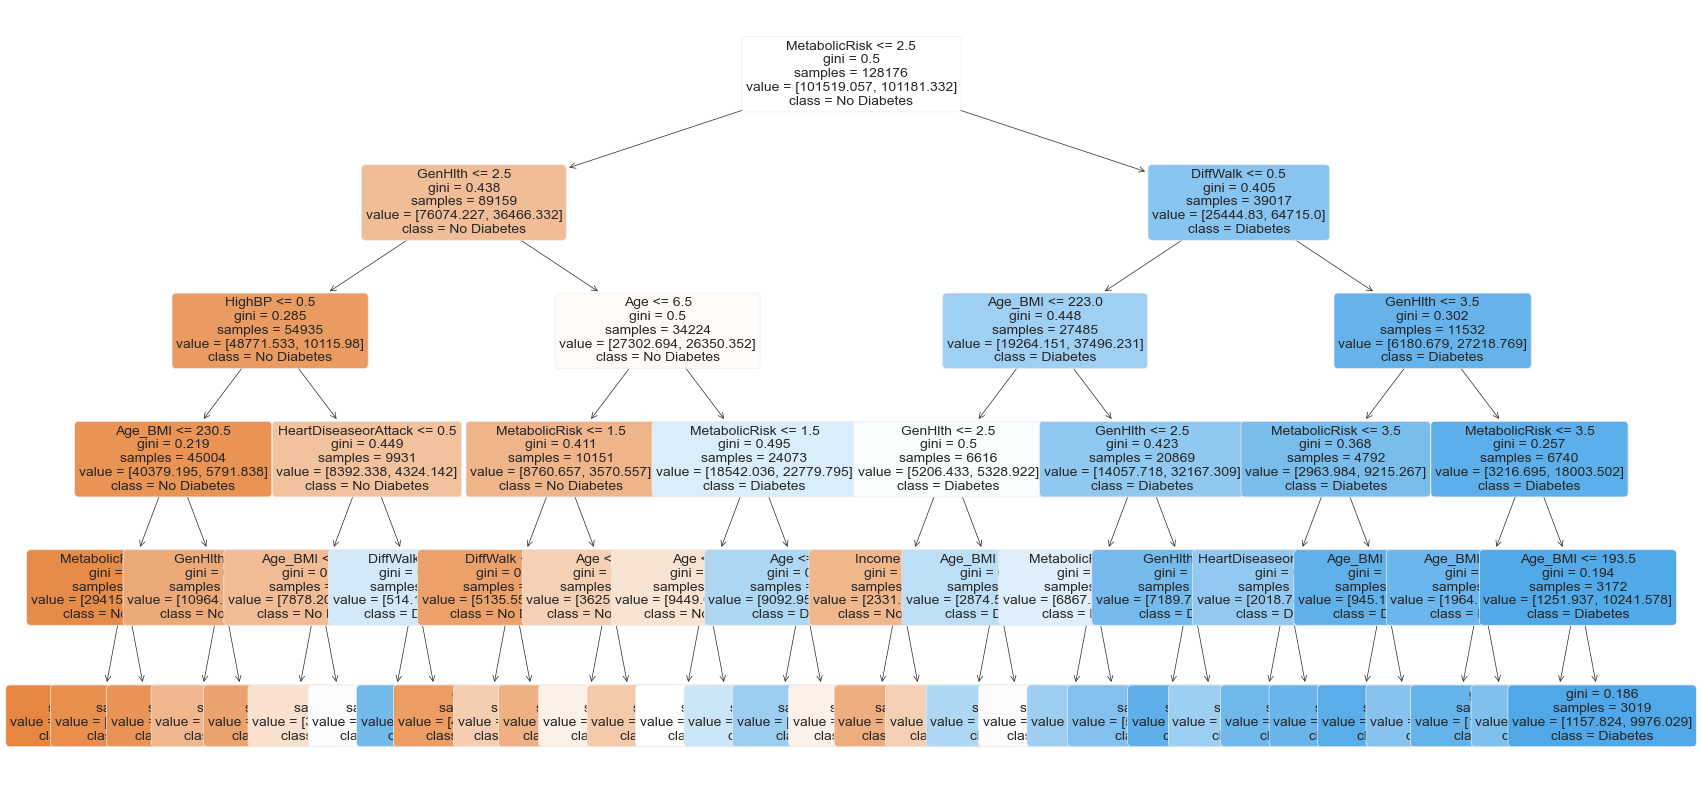

In [65]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Lấy một cây bất kỳ trong RandomForest
tree = best_rf.estimators_[0]  # cây đầu tiên

# --- Cách 1: Print text rules ---
r = export_text(tree, feature_names=list(X_train.columns))
print(r)

# --- Cách 2: Plot tree ---
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, 
          class_names=['No Diabetes','Diabetes'], 
          filled=True, rounded=True, fontsize=10)
plt.show()


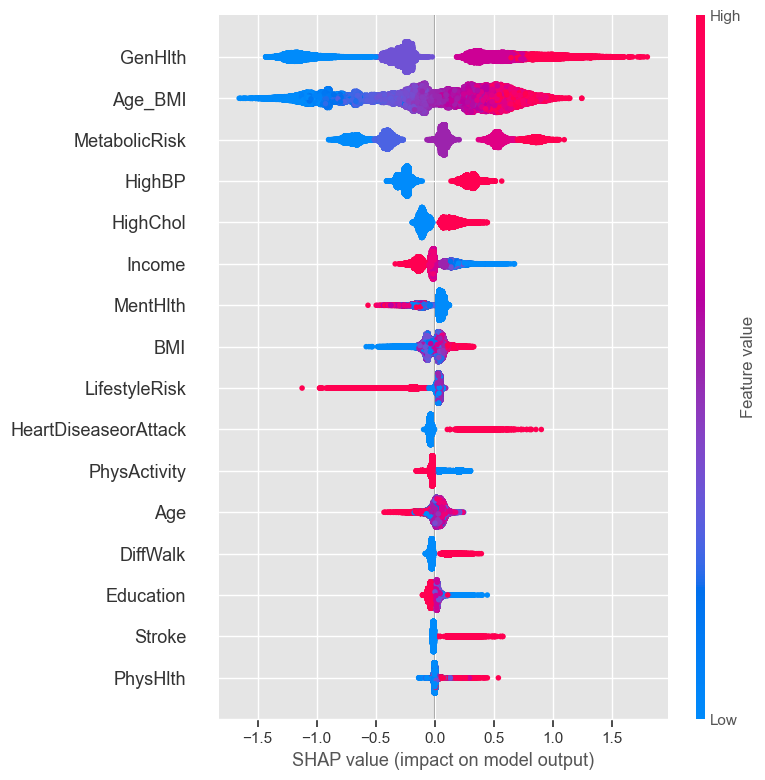

In [66]:
import shap

explainer = shap.TreeExplainer(best_hgb)  # hoặc best_xgb
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [67]:
import graphviz
print(graphviz.__version__)

0.20.1


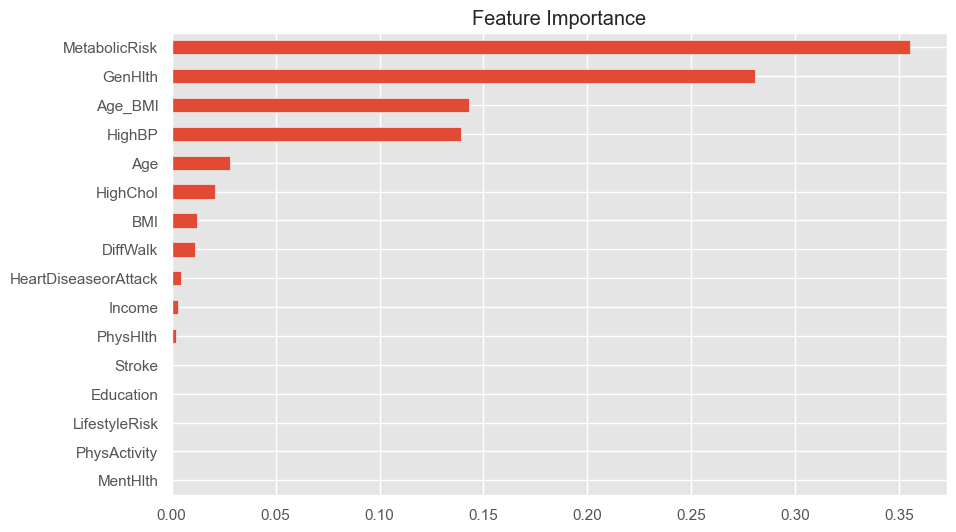

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()

<Figure size 640x480 with 0 Axes>

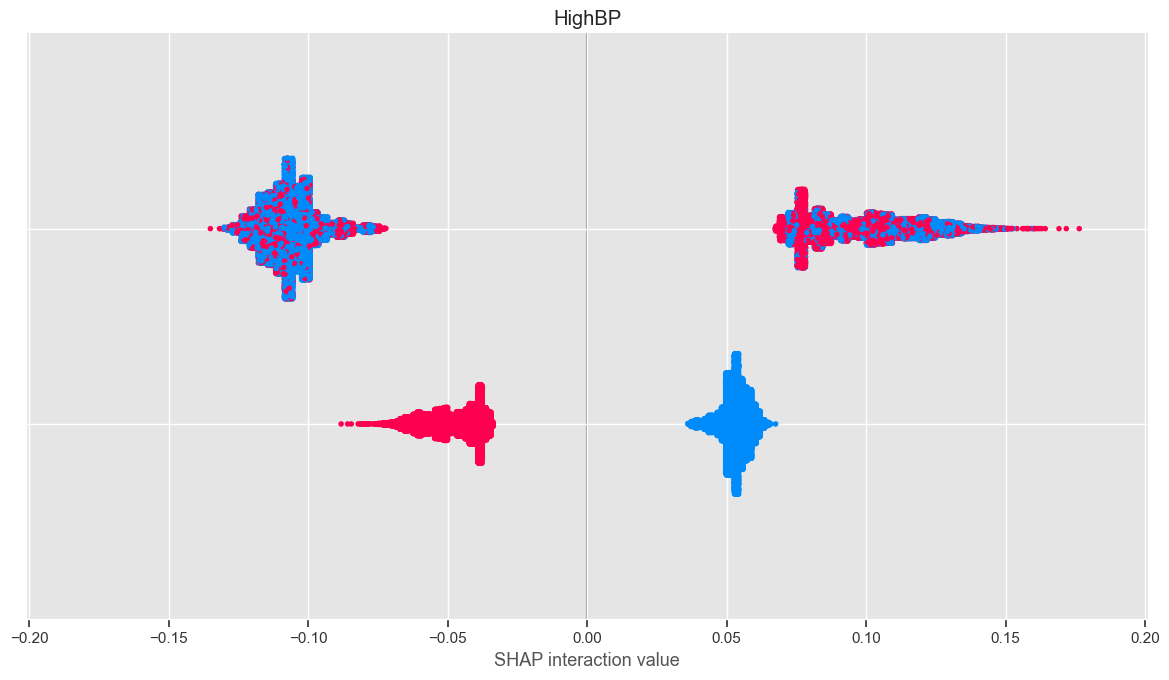

In [69]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


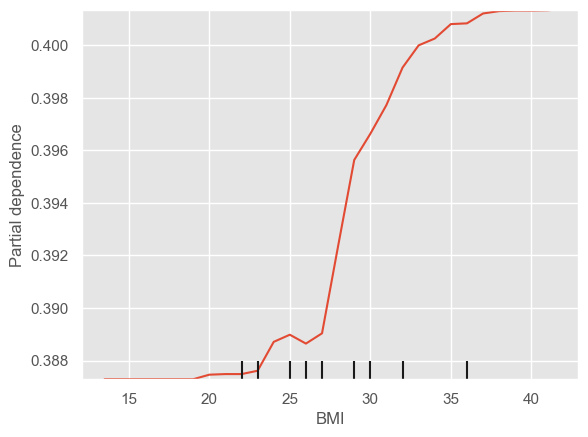

In [70]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(best_rf, X_train, features=["BMI"], feature_names=X_train.columns)
plt.show()


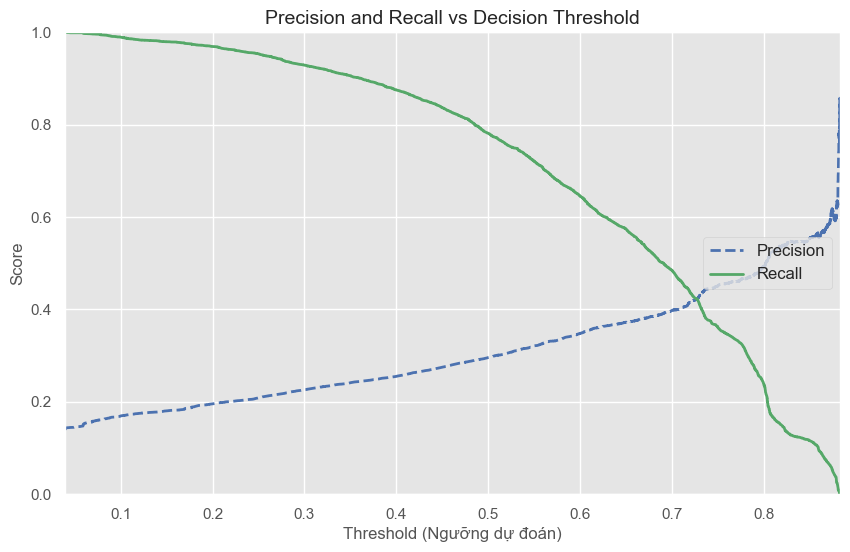

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 1. Lấy xác suất dự đoán thay vì lấy nhãn 0/1 trực tiếp
# [, 1] là lấy xác suất của lớp 'có bệnh'
y_scores = best_rf.predict_proba(X_test)[:, 1]

# 2. Tính toán precision, recall tương ứng với từng ngưỡng (thresholds)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 3. Vẽ biểu đồ
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    
    # Vẽ đường Precision (nét đứt màu xanh)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    
    # Vẽ đường Recall (nét liền màu xanh lá)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    
    # Trang trí biểu đồ
    plt.xlabel("Threshold (Ngưỡng dự đoán)", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend(loc="center right", fontsize=12)
    plt.title("Precision and Recall vs Decision Threshold", fontsize=14)
    plt.grid(True)
    
    # Giới hạn trục Y từ 0 đến 1
    plt.ylim([0, 1])
    plt.xlim([min(thresholds), max(thresholds)])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

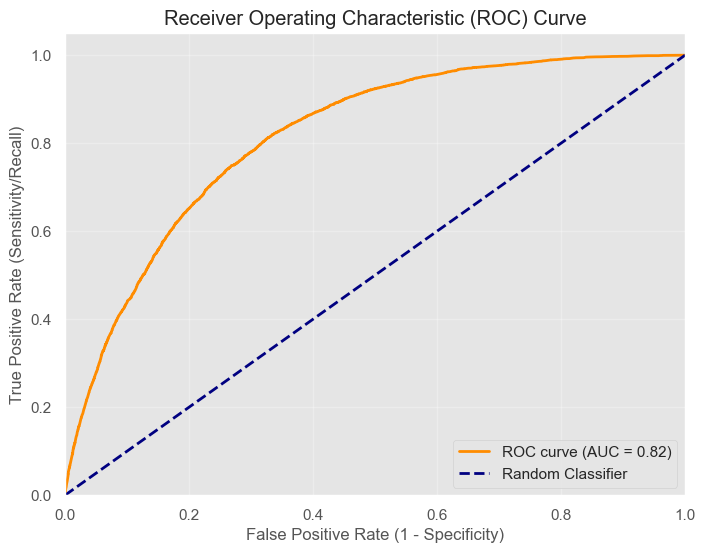

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Lấy xác suất dự đoán cho lớp Positive (có bệnh tiểu đường)
# model là mô hình bạn đã train, X_test là dữ liệu kiểm tra
y_probs = best_rf.predict_proba(X_test)[:, 1]

# 2. Tính toán các giá trị FPR, TPR và thresholds
# FPR: Tỷ lệ dương tính giả (False Positive Rate)
# TPR: Tỷ lệ dương tính thật (True Positive Rate - chính là Recall)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 3. Tính toán chỉ số AUC (Diện tích dưới đường cong)
auc_score = roc_auc_score(y_test, y_probs)

# 4. Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [73]:


# 6. Huấn luyện mô hình Random Forest
# Sử dụng class_weight='balanced' vì dữ liệu tiểu đường thường bị mất cân bằng
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# 7. Dự đoán
y_pred = model.predict(X_test_scaled)

# 8. Đánh giá kết quả
print("--- CONFUSION MATRIX ---")
print(confusion_matrix(y_test, y_pred))
print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

--- CONFUSION MATRIX ---
[[41393  2274]
 [ 5690  1379]]

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     43667
         1.0       0.38      0.20      0.26      7069

    accuracy                           0.84     50736
   macro avg       0.63      0.57      0.58     50736
weighted avg       0.81      0.84      0.82     50736



In [74]:
# Giả sử person_data là danh sách các chỉ số theo đúng thứ tự các cột
person_data = [[1, 1, 1, 28, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 10, 0, 0, 1, 4, 8, 6]]
person_scaled = scaler.transform(person_data)

prediction = model.predict(person_scaled)
probability = model.predict_proba(person_scaled)[:, 1]

print(f"Kết quả: {'Có nguy cơ' if prediction[0] == 1 else 'An toàn'}")
print(f"Xác suất mắc bệnh: {probability[0]*100:.2f}%")

ValueError: X has 21 features, but StandardScaler is expecting 16 features as input.